In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [4]:
# Load data from the CSV file
df = pd.read_csv('../data/user_logs.csv')
df.head()

,timestamp,user_id,group,clicked
0,2025-03-26 16:36:02.884383,a522358a-3326-4c14-9ada-8fb5629aeb94,B,1
1,2025-03-26 16:36:34.545305,e4c7a5c2-f386-4ec7-8805-8aa890ab2806,B,1
2,2025-03-26 16:36:44.627415,be05da13-972d-4712-a00b-1fcc5fbeca88,A,1
3,2025-03-26 16:38:11.191192,393e7ca3-c7df-48c2-9340-b68109425e19,B,0
4,2025-03-26 16:38:56.769272,58887cbf-6b78-4132-9bb5-eaf1b5b0dab1,A,0


In [6]:
df.info()
df.isnull().sum()
df['group'].value_counts()
df['clicked'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10205 entries, 0 to 10204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10205 non-null  object
 1   user_id    10205 non-null  object
 2   group      10205 non-null  object
 3   clicked    10205 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 319.0+ KB


clicked
1    5185
0    5020
Name: count, dtype: int64

In [8]:
summary = df.groupby('group')['clicked'].agg(['count', 'sum', 'mean'])
summary.columns = ['total_users', 'total_clicks', 'conversion_rate']
summary


,total_users,total_clicks,conversion_rate
group,,,
A,5004,1563,0.312350
B,5201,3622,0.696405


In [10]:
group_a = df[df['group'] == 'A']['clicked']
group_b = df[df['group'] == 'B']['clicked']

t_stat, p_val = ttest_ind(group_a, group_b)

print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_val, 4))


T-statistic: -42.0127
P-value: 0.0


C:\Users\tanzi\AppData\Local\Temp\ipykernel_13412\1635349506.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x='group', y='clicked', ci=95)


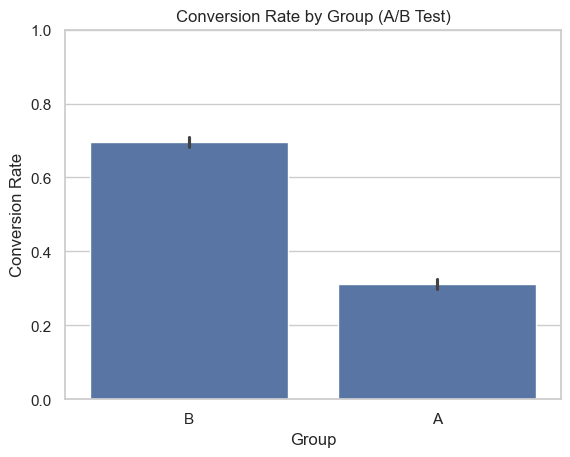

In [12]:
sns.set(style="whitegrid")
sns.barplot(data=df, x='group', y='clicked', ci=95)
plt.title('Conversion Rate by Group (A/B Test)')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.show()


In [16]:
summary.to_csv("ab_test_summary.csv")

In [18]:
plt.savefig("conversion_rate_chart.png")


<Figure size 640x480 with 0 Axes>